In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df_col = pd.read_csv('kdd_cols.csv')
df=pd.read_csv('kddcup.data_10_percent.csv')

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
df['land'] = df['land'].astype('object')

In [8]:
df['logged_in'] = df['logged_in'].astype('object')
df['is_host_login'] = df['is_host_login'].astype('object')
df['is_guest_login'] = df['is_guest_login'].astype('object')


In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
df.shape

(494021, 42)

### Categorical Variables

In [11]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

Text(0, 0.5, 'Count')

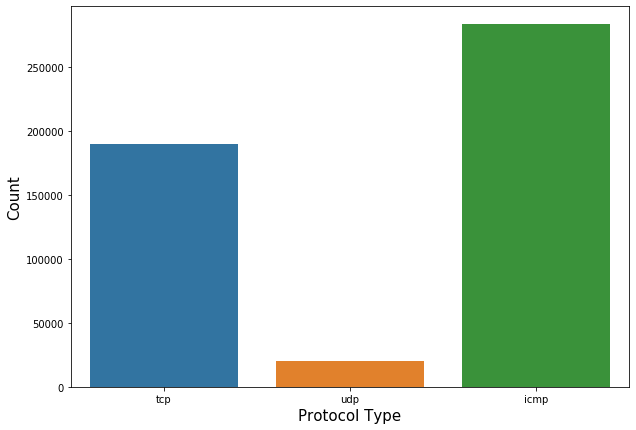

In [12]:
plt.figure(figsize=(10, 7))
sns.countplot(x='protocol_type', data=df)
plt.xlabel('Protocol Type', size=15)
plt.ylabel('Count', size=15)

In [13]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [14]:
df['service'].nunique()

66

In [15]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

Text(0, 0.5, 'Count')

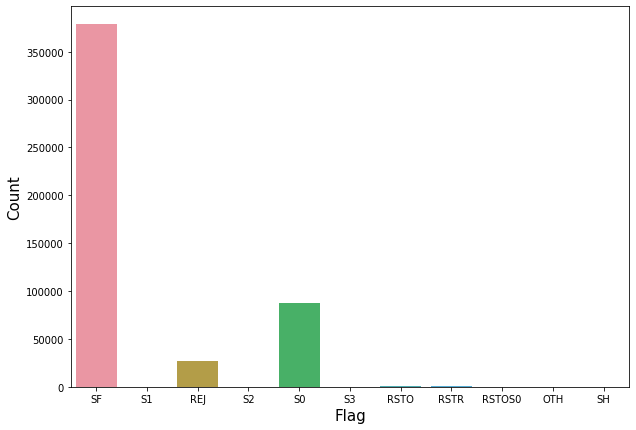

In [16]:
plt.figure(figsize=(10, 7))
sns.countplot(x='flag', data=df)
plt.xlabel('Flag', size=15)
plt.ylabel('Count', size=15)

In [17]:
df['land'].value_counts()

0    493999
1        22
Name: land, dtype: int64

In [18]:
df['logged_in'].value_counts()

0    420784
1     73237
Name: logged_in, dtype: int64

Text(0, 0.5, 'Count')

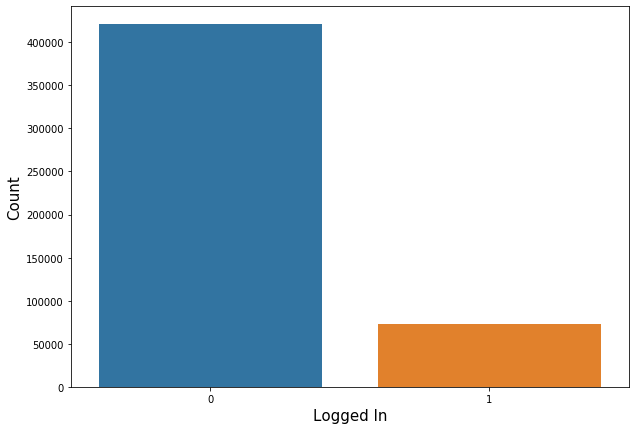

In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(x='logged_in', data=df)
plt.xlabel('Logged In', size=15)
plt.ylabel('Count', size=15)

In [20]:
df['is_host_login'].value_counts()

0    494021
Name: is_host_login, dtype: int64

In [21]:
df['is_guest_login'].value_counts()

0    493336
1       685
Name: is_guest_login, dtype: int64

In [22]:
# target variable

df['intrusion_type'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: intrusion_type, dtype: int64

Text(0, 0.5, 'Count')

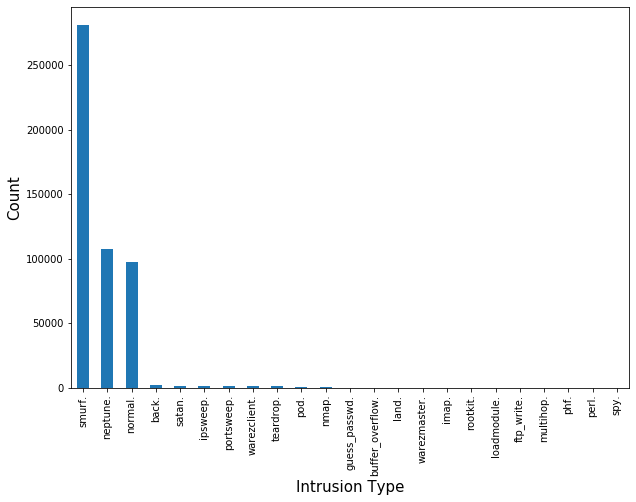

In [23]:
plt.figure(figsize=(10, 7))
df['intrusion_type'].value_counts().plot(kind='bar')
plt.xlabel('Intrusion Type', size=15)
plt.ylabel('Count', size=15)


In [24]:
cat_var = df.select_dtypes('object').columns
num_var = df.select_dtypes(np.number).columns

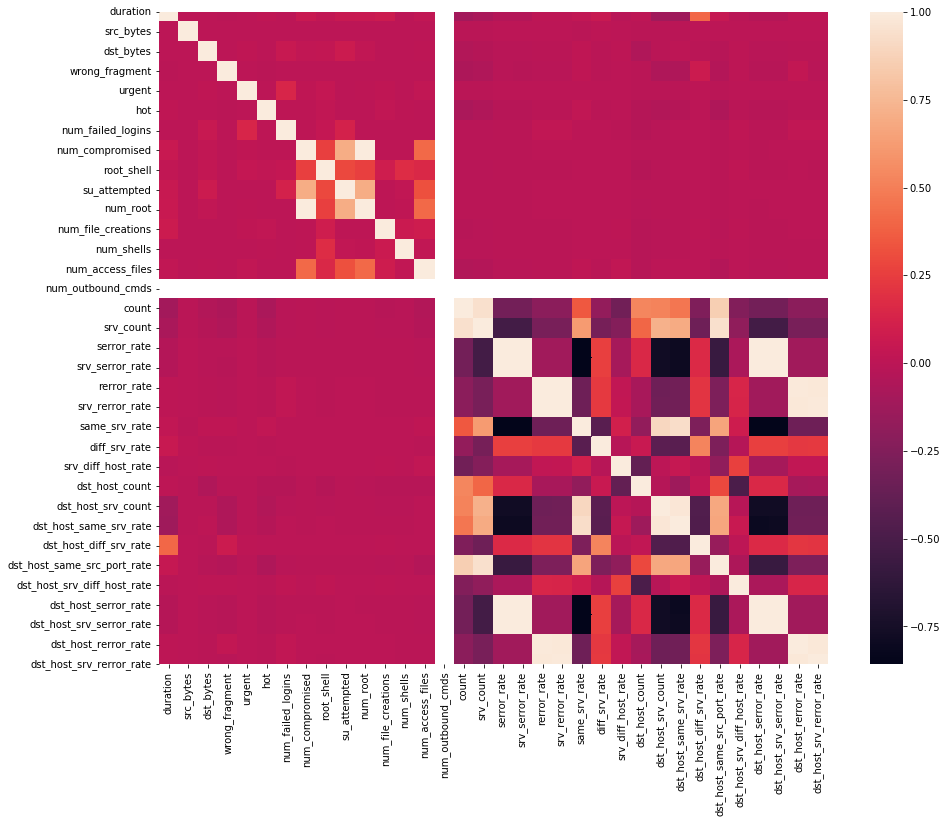

In [25]:
cor = df.select_dtypes(np.number).corr()
fg,ax = plt.subplots(figsize = (15,12) )
sns.heatmap(cor, ax = ax)

In [28]:
df['status'] = 'non-threat'
df['status'].loc[df.intrusion_type != 'normal.'] = 'threat'

C:\Users\Sinjini\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


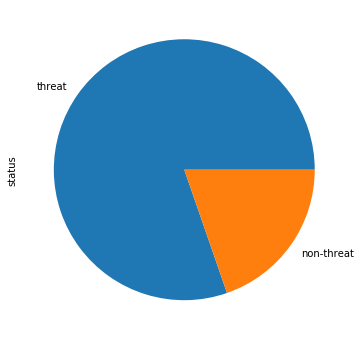

In [29]:
df.status.value_counts().plot(kind = 'pie', figsize = (8,6))

# under representation of non-threat status perhaps undersampling/oversampling techniques could help 

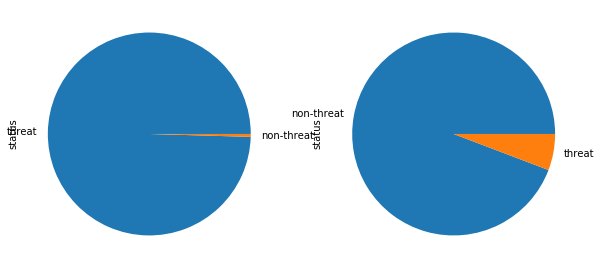

In [30]:
fig, axs = plt.subplots(1 ,2, figsize = (10,8))
df.loc[df.protocol_type == 'icmp'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0])
df.loc[df.protocol_type == 'udp'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1])
# most of protocol type icmp are threats 

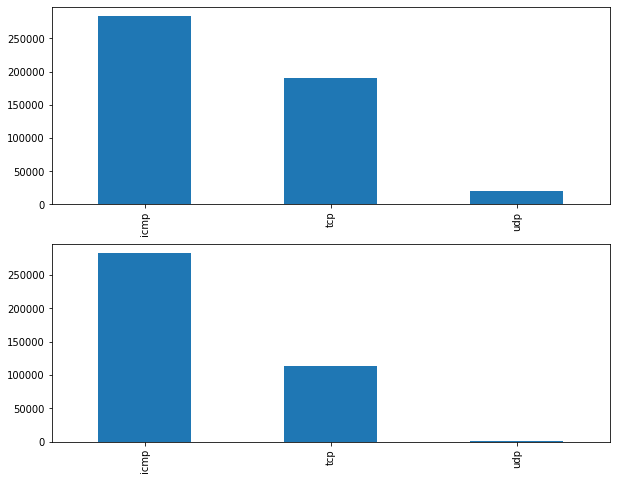

In [32]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
df.protocol_type.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[0])
df.loc[df.status == 'threat'].protocol_type.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[1])

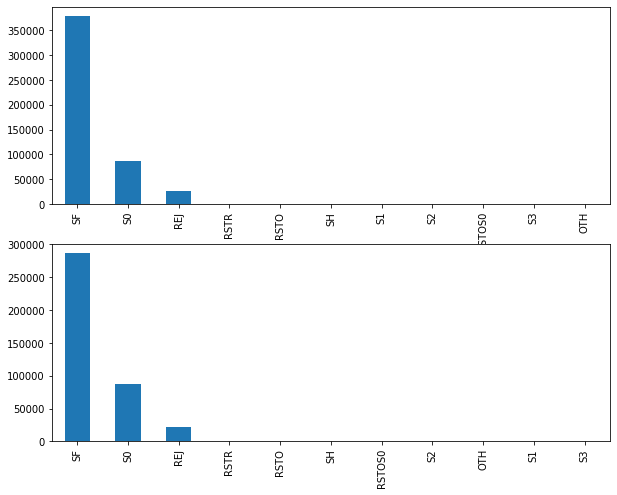

In [34]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
df.flag.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[0])
df.loc[df.status == 'threat'].flag.value_counts().plot(kind = 'bar', figsize = (10,8), ax = axs[1])

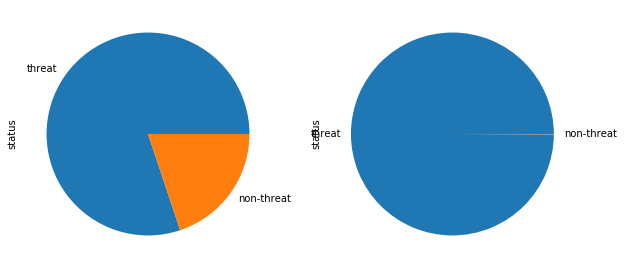

In [36]:
fig, axs = plt.subplots(1 ,2, figsize = (10,8))
df.loc[df.flag == 'REJ'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0])
df.loc[df.flag == 'S0'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1])


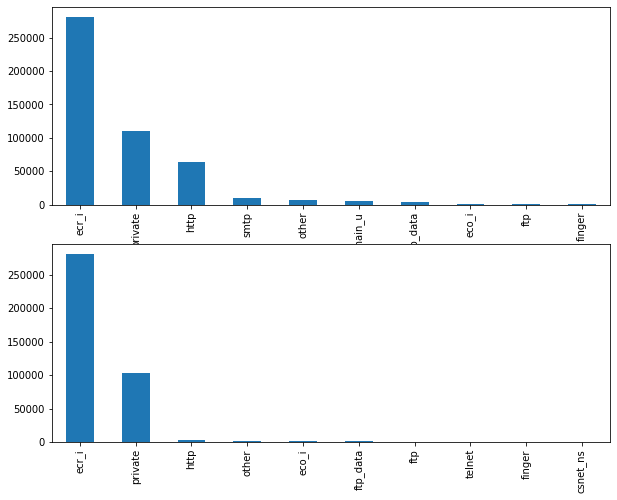

In [37]:
fig, axs = plt.subplots(2, 1, figsize = (10,8))
df.service.value_counts()[:10].plot(kind = 'bar', figsize = (10,8), ax = axs[0])
df.loc[df.status == 'threat'].service.value_counts()[:10].plot(kind = 'bar', figsize = (10,8), ax = axs[1])

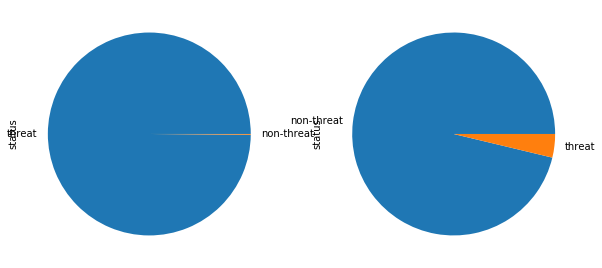

In [38]:
fig, axs = plt.subplots(1 ,2, figsize = (10,8))
df.loc[df.service == 'ecr_i'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[0])
df.loc[df.service == 'http'].status.value_counts().plot(kind = 'pie', figsize = (10,8), ax = axs[1])

#most of the http seem to be non threat

C:\Users\Sinjini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


S1     94.736842
S2     70.833333
S3     70.000000
SF     24.233432
REJ    19.873488
Name: pert, dtype: float64

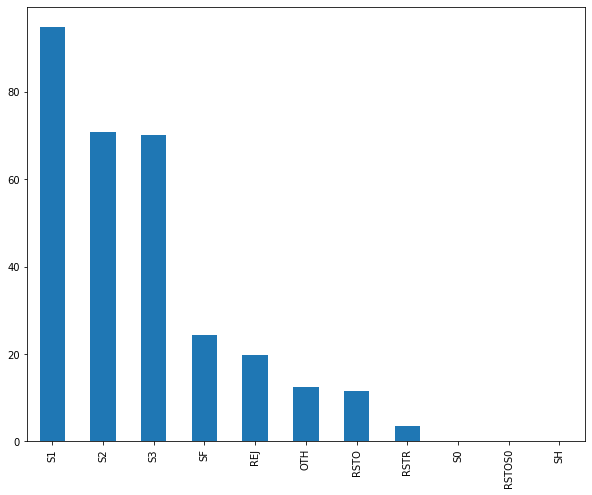

In [40]:
def plot_pert(feat):
    d1 = df.loc[df.intrusion_type == 'normal.'][feat].value_counts()
    d2 = df[feat].value_counts()
    df2 = pd.concat([d1,d2], axis= 1)
    df2['pert'] = df2.iloc[:,0]/df2.iloc[:,1]*100
    df2 = df2.sort_values(by ='pert',ascending=False)
    df2.pert.plot(kind = 'bar', figsize = (10,8))
    display(df2.pert.head(5))
    return 

plot_pert('flag')


C:\Users\Sinjini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


ntp_u       100.000000
urh_i       100.000000
tftp_u      100.000000
red_i       100.000000
domain_u     99.982944
Name: pert, dtype: float64

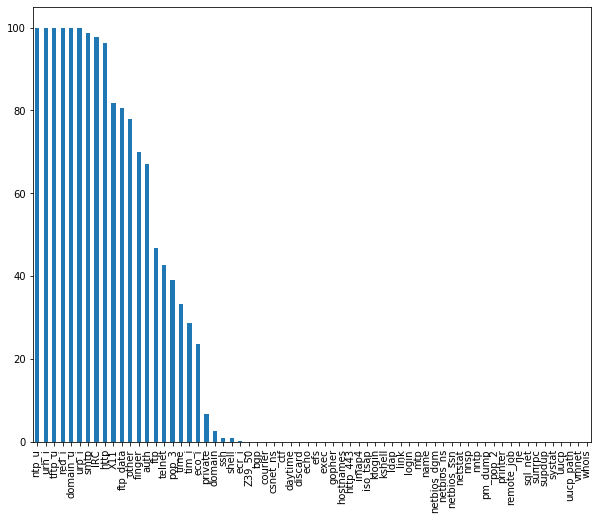

In [41]:
plot_pert('service')

C:\Users\Sinjini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


udp     94.217353
tcp     40.414069
icmp     0.454158
Name: pert, dtype: float64

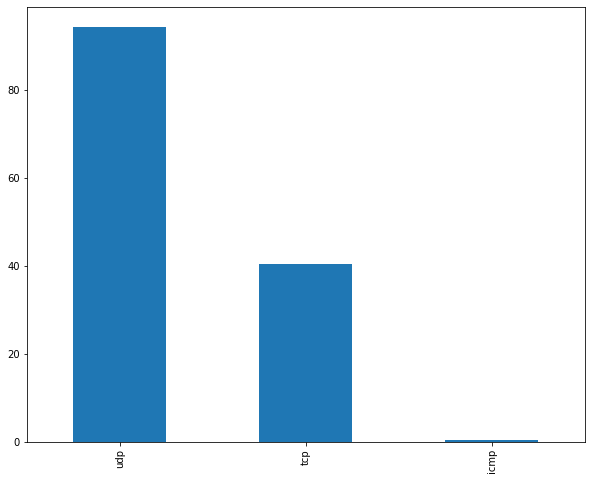

In [42]:
plot_pert('protocol_type')

1    95.496812
0     6.497158
Name: pert, dtype: float64

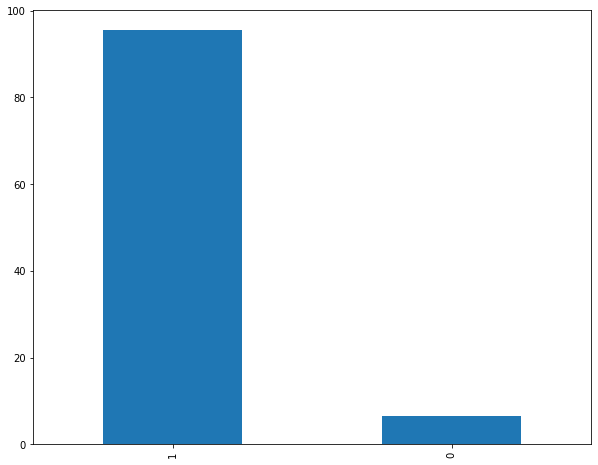

In [43]:
plot_pert('logged_in')

1    89.583333
0    19.684394
2          NaN
Name: pert, dtype: float64

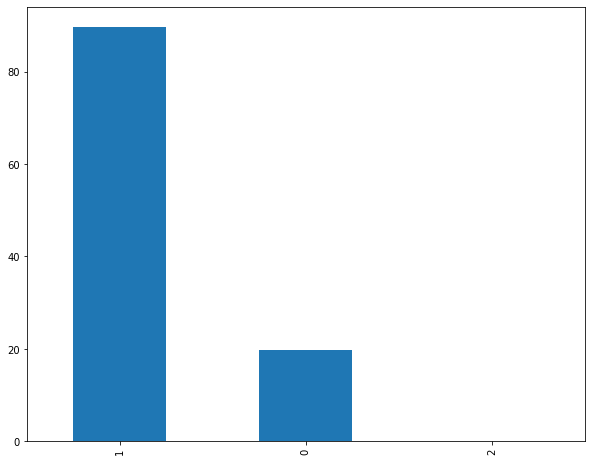

In [44]:
plot_pert('num_shells')

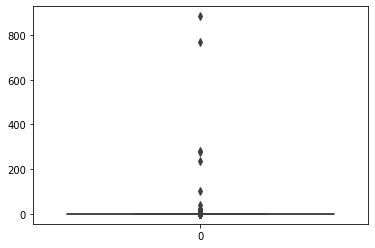

In [46]:
sns.boxplot(df['num_compromised'].loc[df['num_compromised']<1000])

In [53]:
sns.boxplot(df['num_file_creations'].loc[df['num_file_creations']>1])
# kdd['num_file_creations'].value_counts()

KeyError: 0

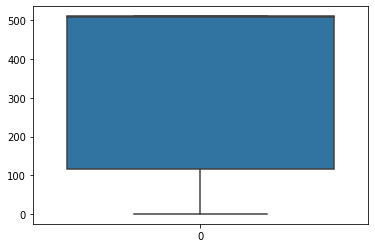

In [48]:
sns.boxplot(df['count'])

In [49]:
df['nsl'] = np.log1p(df['num_shells'])

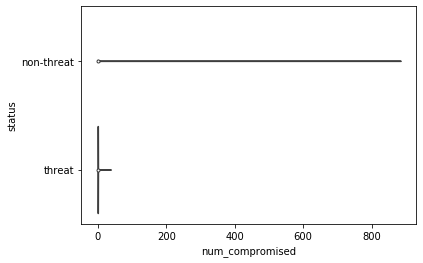

In [50]:
sns.violinplot(data=df, x="num_compromised", y="status")

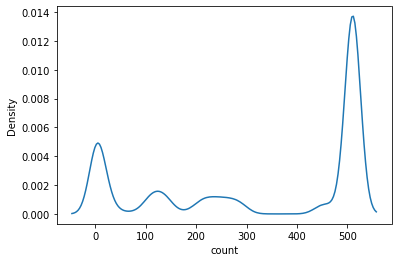

In [51]:
sns.kdeplot(x = df['count'])

### Continuous variables

In [67]:
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.006433,0.000014,0.034519,0.000152,0.010212,0.000111,0.000036,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.134805,0.005510,0.782103,0.015520,1.798326,0.010551,0.007793,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,3.000000,3.000000,30.000000,5.000000,884.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Histogram for duration')

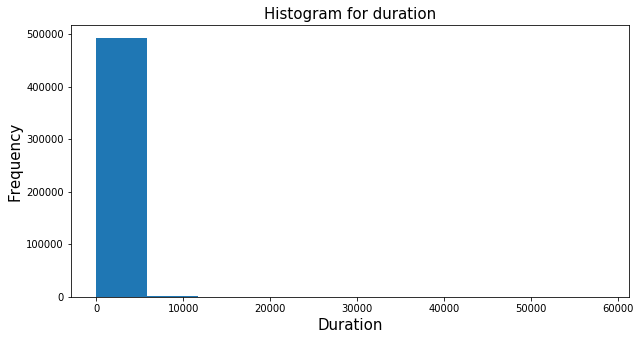

In [80]:
plt.figure(figsize=(10, 5))
plt.hist(df['duration'])
plt.xlabel('Duration', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Histogram for duration', size=15)

Text(0.5, 1.0, 'Histogram for duration (0 to 6000)')

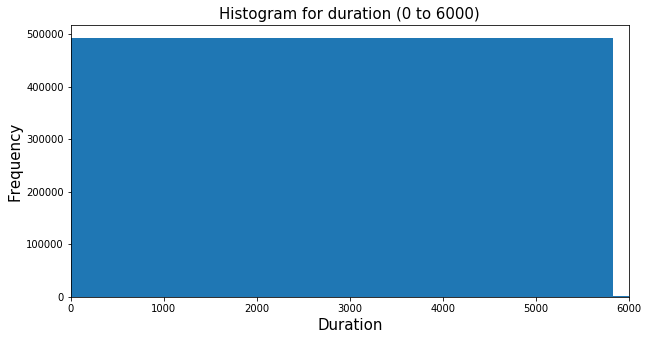

In [83]:
plt.figure(figsize=(10, 5))
plt.hist(df['duration'])
plt.xlim(0, 6000)
plt.xlabel('Duration', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Histogram for duration (0 to 6000)', size=15)

Text(0.5, 1.0, 'Histogram for duration (6000 to 15000)')

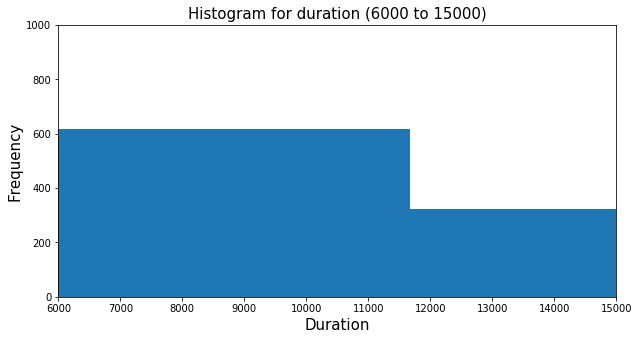

In [87]:
plt.figure(figsize=(10, 5))
plt.hist(df['duration'])
plt.xlim(6000, 15000)
plt.ylim(0, 1000)
plt.xlabel('Duration', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Histogram for duration (6000 to 15000)', size=15)

Text(0.5, 1.0, 'Histogram for duration (15000 to 30000)')

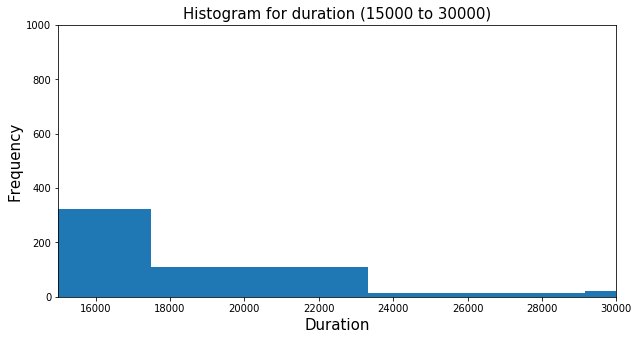

In [88]:
plt.figure(figsize=(10, 5))
plt.hist(df['duration'])
plt.xlim(15000, 30000)
plt.ylim(0, 1000)
plt.xlabel('Duration', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Histogram for duration (15000 to 30000)', size=15)

Text(0.5, 1.0, 'Histogram for duration (30000 to 58329)')

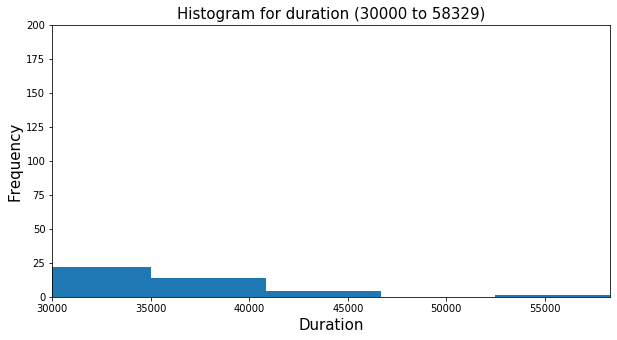

In [92]:
plt.figure(figsize=(10, 5))
plt.hist(df['duration'])
plt.xlim(30000, 58329)
plt.ylim(0, 200)
plt.xlabel('Duration', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Histogram for duration (30000 to 58329)', size=15)

Text(0.5, 1.0, 'Histogram for Source Bytes')

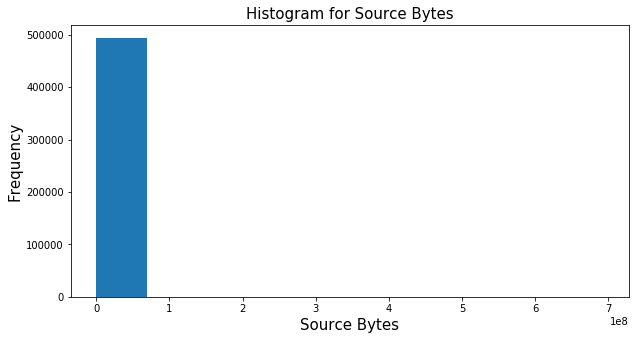

In [94]:
plt.figure(figsize=(10, 5))
plt.hist(df['src_bytes'])
plt.xlabel('Source Bytes', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Histogram for Source Bytes', size=15)

Text(0.5, 1.0, 'Histogram for Destination Bytes')

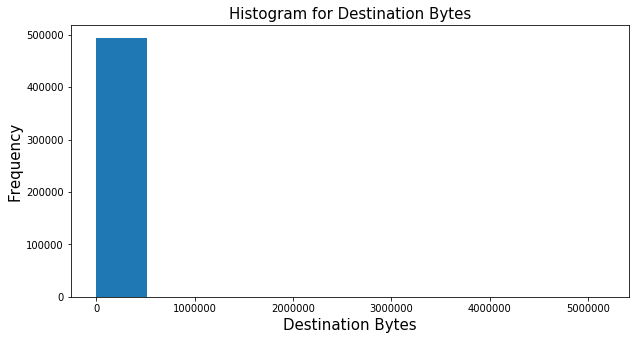

In [95]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_bytes'])
plt.xlabel('Destination Bytes', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Histogram for Destination Bytes', size=15)

Text(0.5, 1.0, 'Histogram for Destination Bytes')

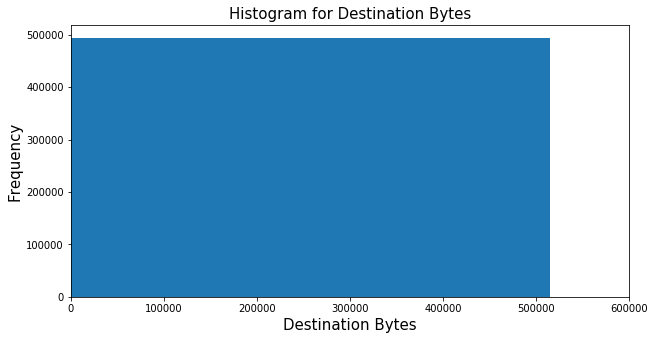

In [100]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_bytes'])
plt.xlim(0, 600000)
plt.xlabel('Destination Bytes', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Histogram for Destination Bytes (0 to 600000)', size=15)

Text(0.5, 1.0, 'Histogram for Destination Bytes (600000 to 1000000)')

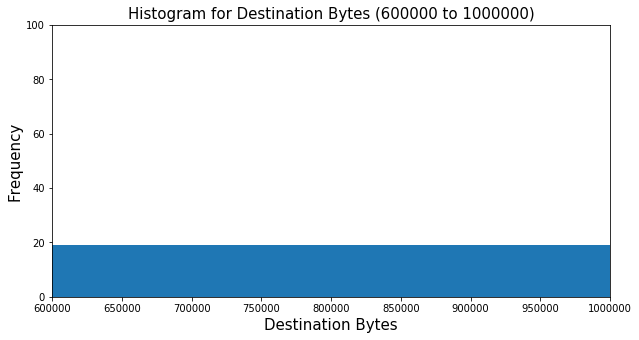

In [104]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_bytes'])
plt.xlim(600000, 1000000)
plt.ylim(0, 100)
plt.xlabel('Destination Bytes', size=15)
plt.ylabel('Frequency', size=15)
plt.title('Histogram for Destination Bytes (600000 to 1000000)', size=15)

Text(0, 0.5, 'Frequency')

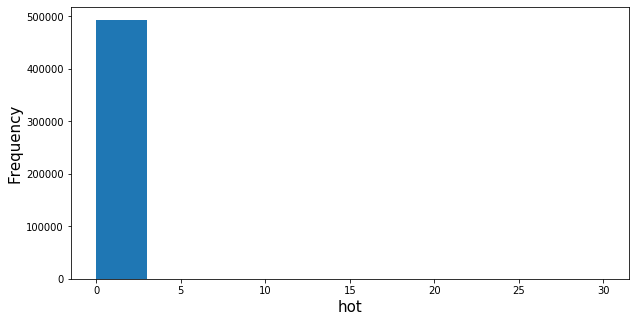

In [108]:
plt.figure(figsize=(10, 5))
plt.hist(df['hot'])
#plt.xlim(0, 10)
plt.xlabel('hot', size=15)
plt.ylabel('Frequency', size=15)


Text(0, 0.5, 'Frequency')

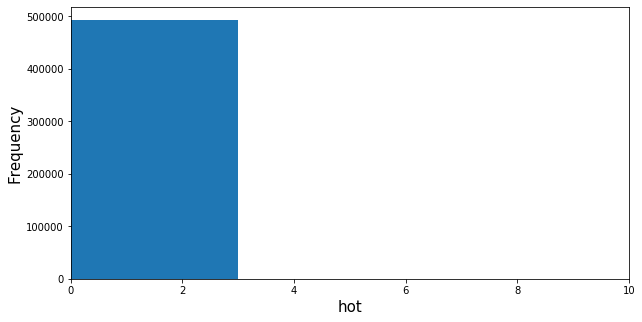

In [109]:
plt.figure(figsize=(10, 5))
plt.hist(df['hot'])
plt.xlim(0, 10)
plt.xlabel('hot', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

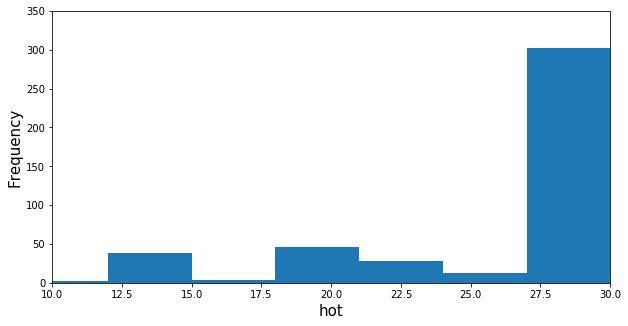

In [113]:
plt.figure(figsize=(10, 5))
plt.hist(df['hot'])
plt.xlim(10, 30)
plt.ylim(0, 350)
plt.xlabel('hot', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

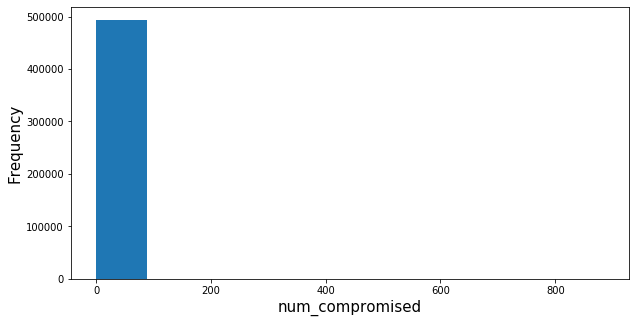

In [114]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_compromised'])
plt.xlabel('num_compromised', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

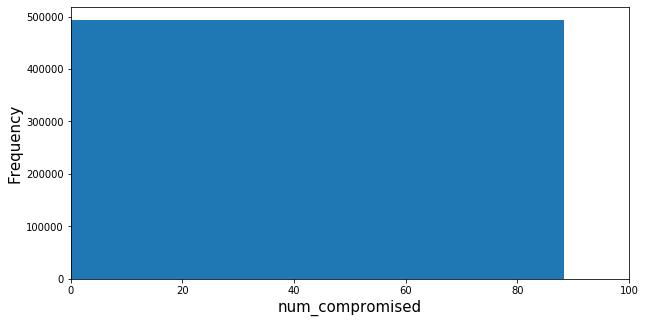

In [115]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_compromised'])
plt.xlim(0, 100)
plt.xlabel('num_compromised', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

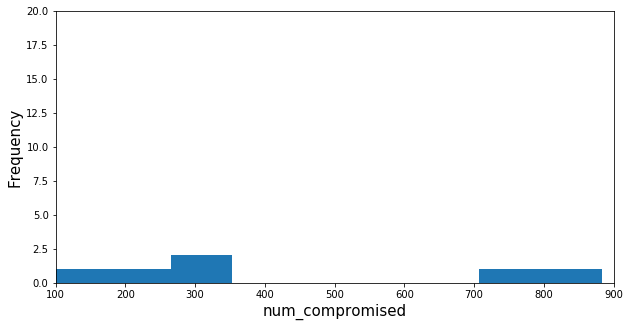

In [122]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_compromised'])
plt.xlim(100, 900)
plt.ylim(0, 20)
plt.xlabel('num_compromised', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

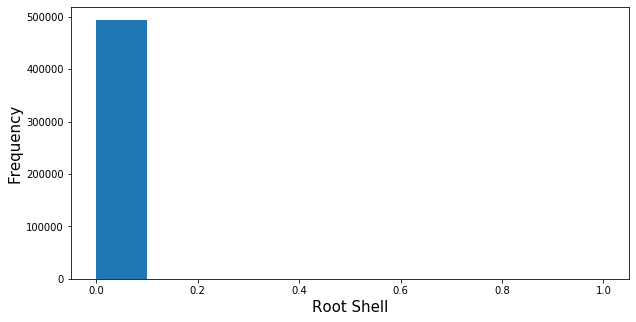

In [123]:
plt.figure(figsize=(10, 5))
plt.hist(df['root_shell'])
plt.xlabel('Root Shell', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

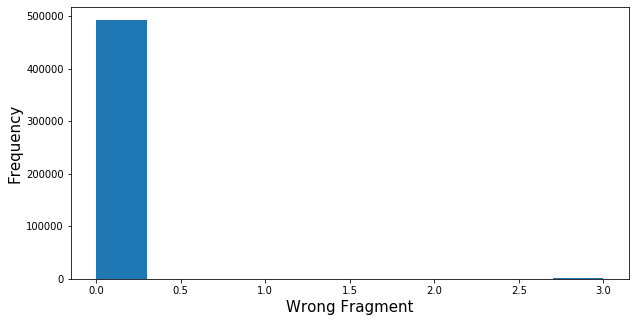

In [124]:
plt.figure(figsize=(10, 5))
plt.hist(df['wrong_fragment'])
plt.xlabel('Wrong Fragment', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

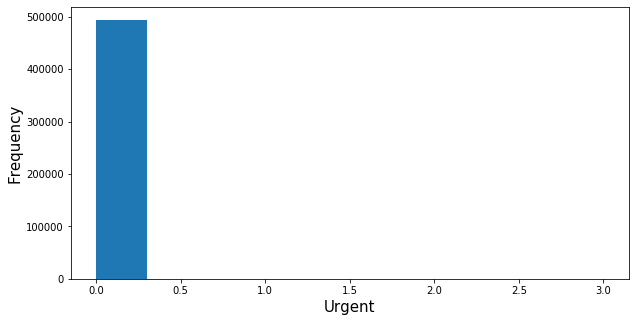

In [125]:
plt.figure(figsize=(10, 5))
plt.hist(df['urgent'])
plt.xlabel('Urgent', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

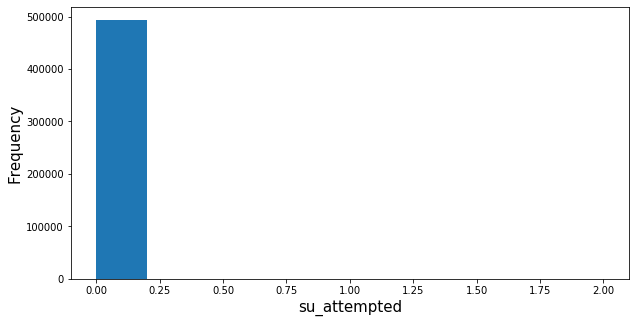

In [126]:
plt.figure(figsize=(10, 5))
plt.hist(df['su_attempted'])
plt.xlabel('su_attempted', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

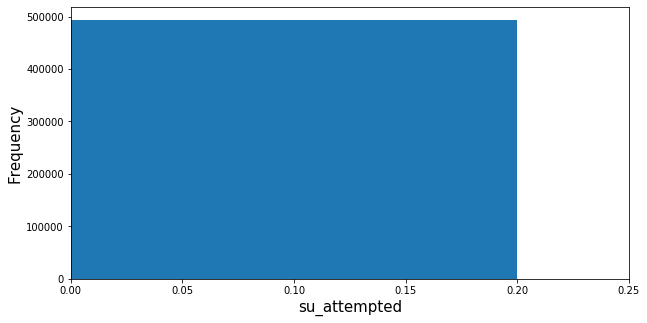

In [127]:
plt.figure(figsize=(10, 5))
plt.hist(df['su_attempted'])
plt.xlim(0, 0.25)
plt.xlabel('su_attempted', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

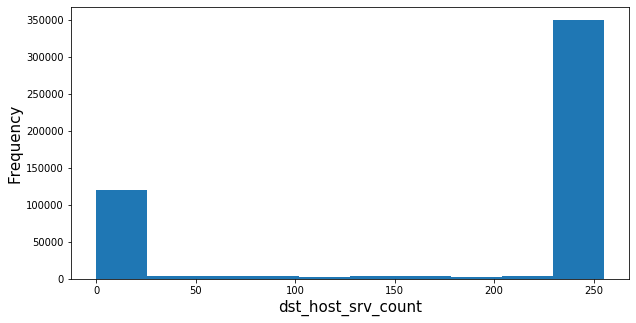

In [128]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_srv_count'])
plt.xlabel('dst_host_srv_count', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

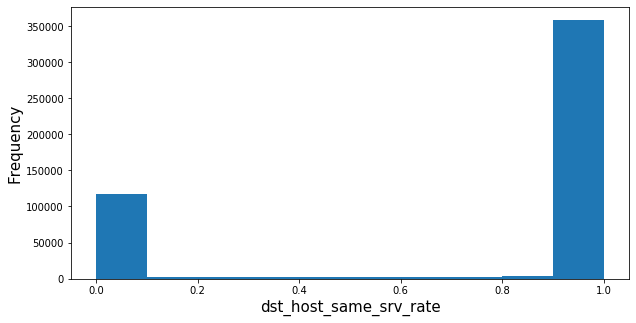

In [129]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_same_srv_rate'])
plt.xlabel('dst_host_same_srv_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

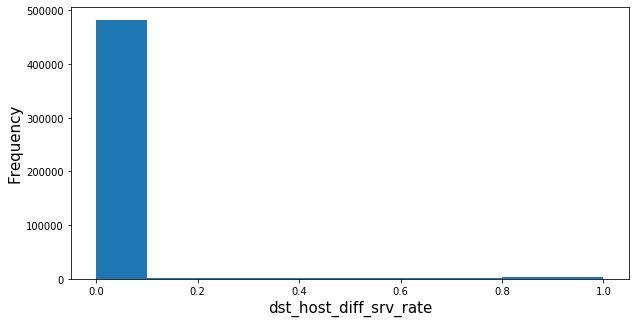

In [130]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_diff_srv_rate'])
plt.xlabel('dst_host_diff_srv_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

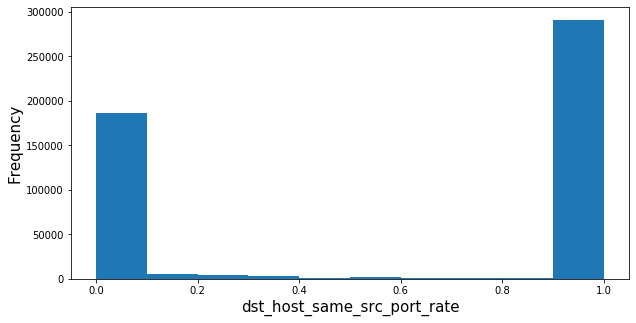

In [131]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_same_src_port_rate'])
plt.xlabel('dst_host_same_src_port_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

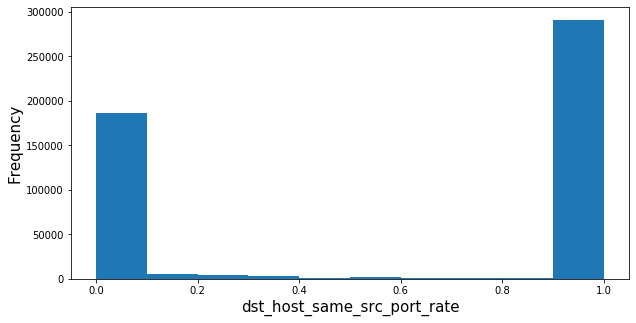

In [132]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_same_src_port_rate'])
plt.xlabel('dst_host_same_src_port_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

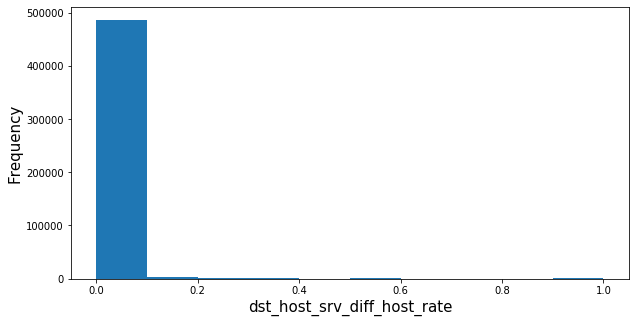

In [133]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_srv_diff_host_rate'])
plt.xlabel('dst_host_srv_diff_host_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

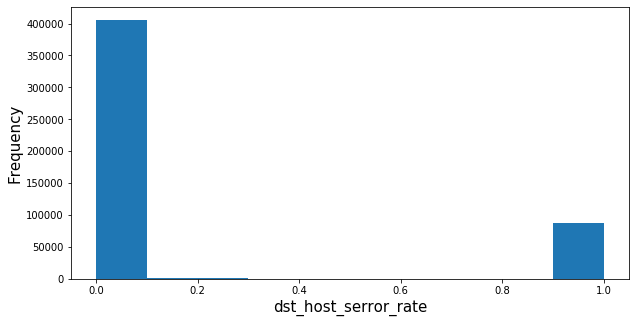

In [134]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_serror_rate'])
plt.xlabel('dst_host_serror_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

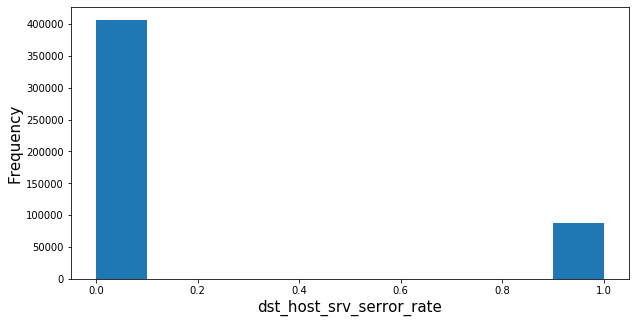

In [135]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_srv_serror_rate'])
plt.xlabel('dst_host_srv_serror_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

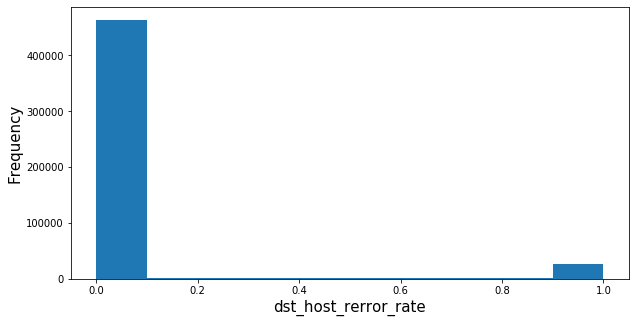

In [136]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_rerror_rate'])
plt.xlabel('dst_host_rerror_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

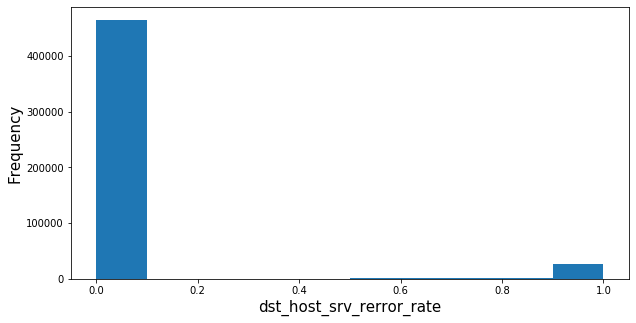

In [137]:
plt.figure(figsize=(10, 5))
plt.hist(df['dst_host_srv_rerror_rate'])
plt.xlabel('dst_host_srv_rerror_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

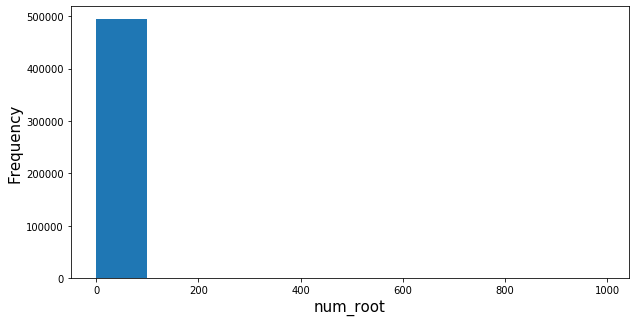

In [138]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_root'])
plt.xlabel('num_root', size=15)
plt.ylabel('Frequency', size=15)

In [140]:
print(max(df['num_root']))
print(min(df['num_root']))

993
0


Text(0, 0.5, 'Frequency')

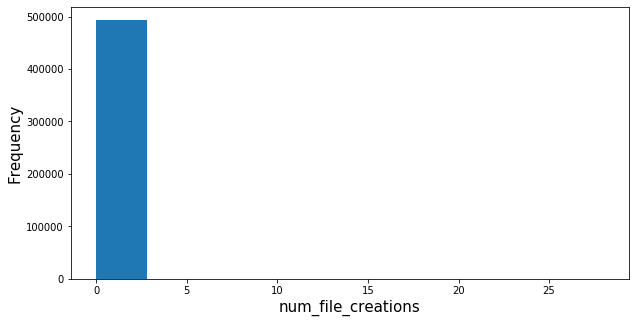

In [141]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_file_creations'])
plt.xlabel('num_file_creations', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

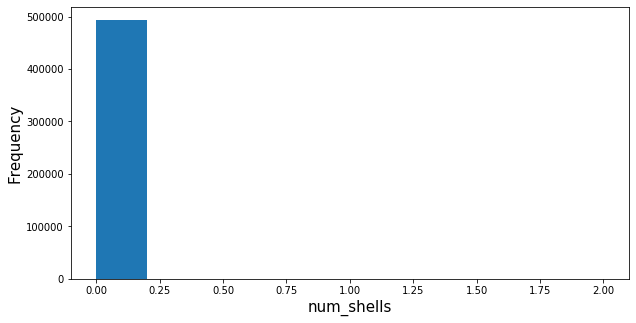

In [142]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_shells'])
plt.xlabel('num_shells', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

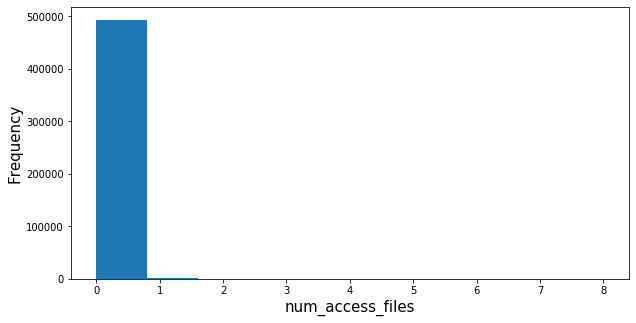

In [143]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_access_files'])
plt.xlabel('num_access_files', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

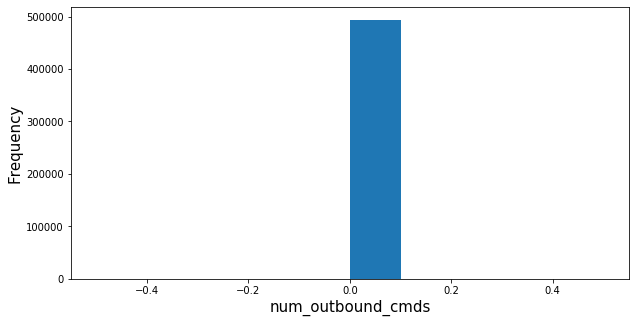

In [144]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_outbound_cmds'])
plt.xlabel('num_outbound_cmds', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

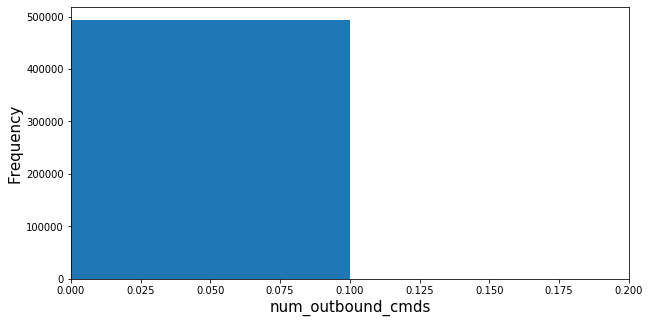

In [147]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_outbound_cmds'])
plt.xlim(0, 0.2)
plt.xlabel('num_outbound_cmds', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

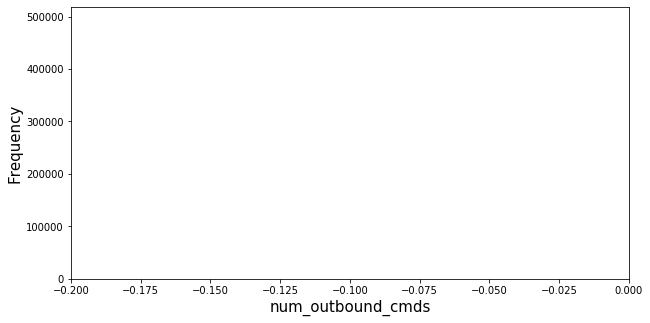

In [148]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_outbound_cmds'])
plt.xlim(-0.2, 0)
plt.xlabel('num_outbound_cmds', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

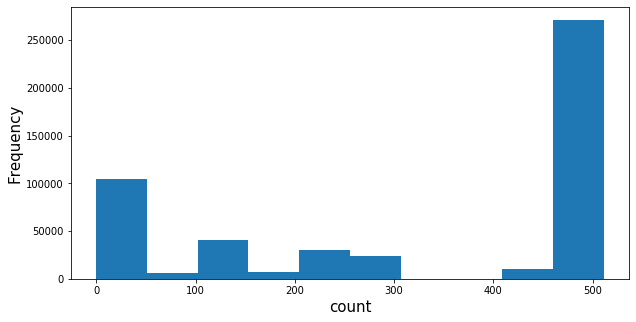

In [149]:
plt.figure(figsize=(10, 5))
plt.hist(df['count'])
plt.xlabel('count', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

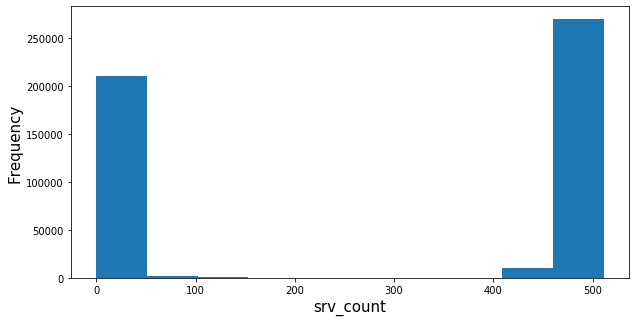

In [150]:
plt.figure(figsize=(10, 5))
plt.hist(df['srv_count'])
plt.xlabel('srv_count', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

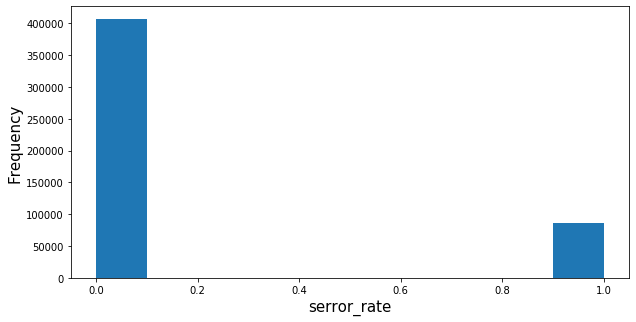

In [151]:
plt.figure(figsize=(10, 5))
plt.hist(df['serror_rate'])
plt.xlabel('serror_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

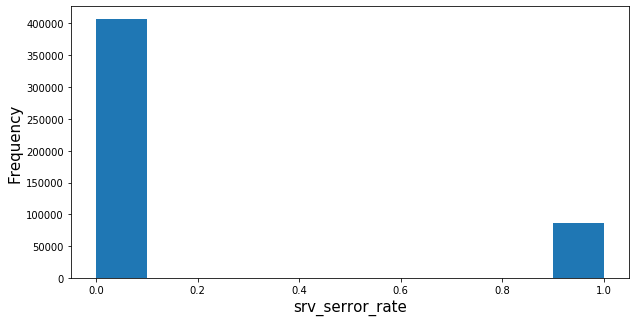

In [152]:
plt.figure(figsize=(10, 5))
plt.hist(df['srv_serror_rate'])
plt.xlabel('srv_serror_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

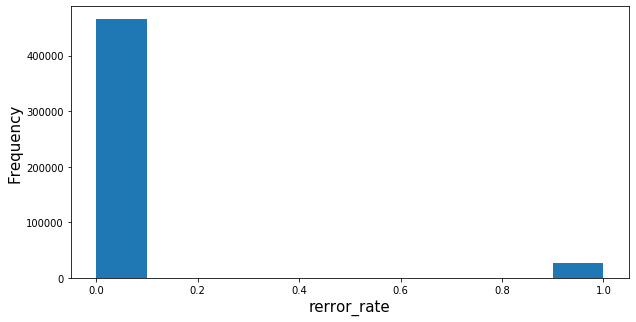

In [153]:
plt.figure(figsize=(10, 5))
plt.hist(df['rerror_rate'])
plt.xlabel('rerror_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

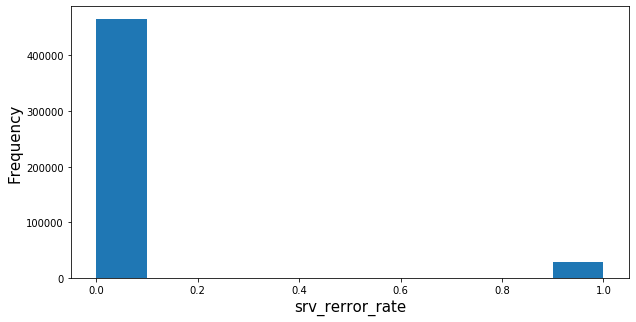

In [154]:
plt.figure(figsize=(10, 5))
plt.hist(df['srv_rerror_rate'])
plt.xlabel('srv_rerror_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

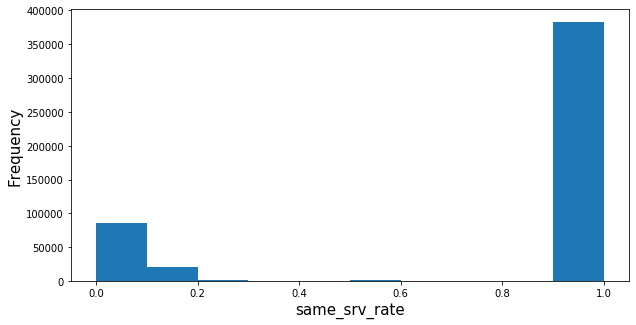

In [155]:
plt.figure(figsize=(10, 5))
plt.hist(df['same_srv_rate'])
plt.xlabel('same_srv_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

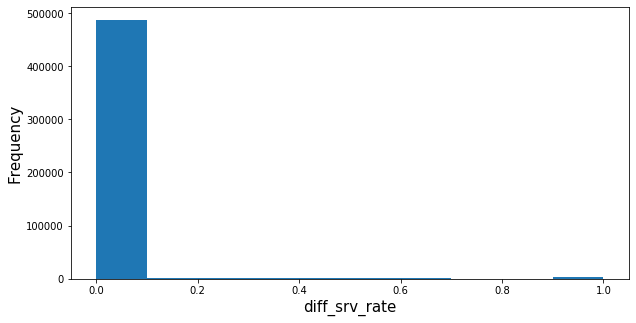

In [156]:
plt.figure(figsize=(10, 5))
plt.hist(df['diff_srv_rate'])
plt.xlabel('diff_srv_rate', size=15)
plt.ylabel('Frequency', size=15)

Text(0, 0.5, 'Frequency')

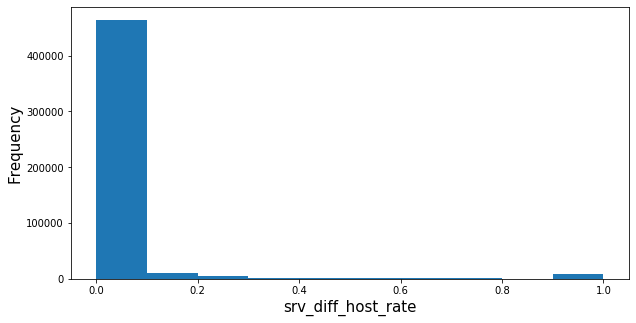

In [157]:
plt.figure(figsize=(10, 5))
plt.hist(df['srv_diff_host_rate'])
plt.xlabel('srv_diff_host_rate', size=15)
plt.ylabel('Frequency', size=15)

In [3]:
Column_names=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','Target']
data_kdd=pd.read_csv('./kddcup.data.corrected.csv',names=Column_names)

In [4]:
data_kdd.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [5]:
labels=data_kdd['service'].unique()
values=[]
for i in labels:
    values.append(len(data_kdd.loc[(data_kdd['service']==i)]))

ar=sorted(list(zip(values,labels)),reverse=True)
for i in ar:
    print("{} : {}".format(i[1],i[0]),end=",")

ecr_i : 2811660,private : 1100831,http : 623091,smtp : 96554,other : 72653,domain_u : 57782,ftp_data : 40697,eco_i : 16338,finger : 6891,urp_i : 5378,ftp : 5214,telnet : 4277,ntp_u : 3833,auth : 3382,pop_3 : 1981,time : 1579,domain : 1113,Z39_50 : 1078,gopher : 1077,mtp : 1076,ssh : 1075,whois : 1073,remote_job : 1073,rje : 1070,link : 1069,imap4 : 1069,ctf : 1068,name : 1067,supdup : 1060,nntp : 1059,echo : 1059,discard : 1059,uucp_path : 1057,systat : 1056,sunrpc : 1056,netstat : 1056,daytime : 1056,pop_2 : 1055,netbios_ssn : 1055,netbios_ns : 1054,vmnet : 1053,sql_net : 1052,netbios_dgm : 1052,iso_tsap : 1052,shell : 1051,csnet_ns : 1051,klogin : 1050,hostnames : 1050,bgp : 1047,printer : 1045,login : 1045,exec : 1045,http_443 : 1044,efs : 1042,uucp : 1041,ldap : 1041,kshell : 1040,nnsp : 1038,courier : 1021,IRC : 521,urh_i : 148,X11 : 135,tim_i : 12,red_i : 9,pm_dump : 5,tftp_u : 3,http_8001 : 2,harvest : 2,aol : 2,http_2784 : 1,

In [6]:
df=data_kdd
ser_c=[]
for i in ar[11:]:
    ser_c.append(i[1])
df['service']=df['service'].replace(ser_c,'cc')

In [7]:
df['service'].unique()

array(['http', 'smtp', 'domain_u', 'cc', 'finger', 'eco_i', 'ftp',
       'ecr_i', 'other', 'urp_i', 'private', 'ftp_data'], dtype=object)

In [8]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


In [9]:
x_df=df.drop(['Target'],axis=1)

In [10]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

In [11]:
x_df["service_c"] = ord_enc.fit_transform(x_df[["service"]])
x_df["protocol_type_c"] = ord_enc.fit_transform(x_df[["protocol_type"]])
x_df["flag_c"] = ord_enc.fit_transform(x_df[["flag"]])

print(x_df['service_c'].unique())
print(x_df['protocol_type_c'].unique())
print(x_df['flag_c'].unique())

[ 7. 10.  1.  0.  4.  2.  5.  3.  8. 11.  9.  6.]
[1. 2. 0.]
[ 9.  7.  6.  8.  0.  1.  2.  5.  4.  3. 10.]


In [12]:
d_rel=x_df.drop(['service','protocol_type','flag'],axis=1)

In [13]:
d_rel.dtypes

duration                         int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate            

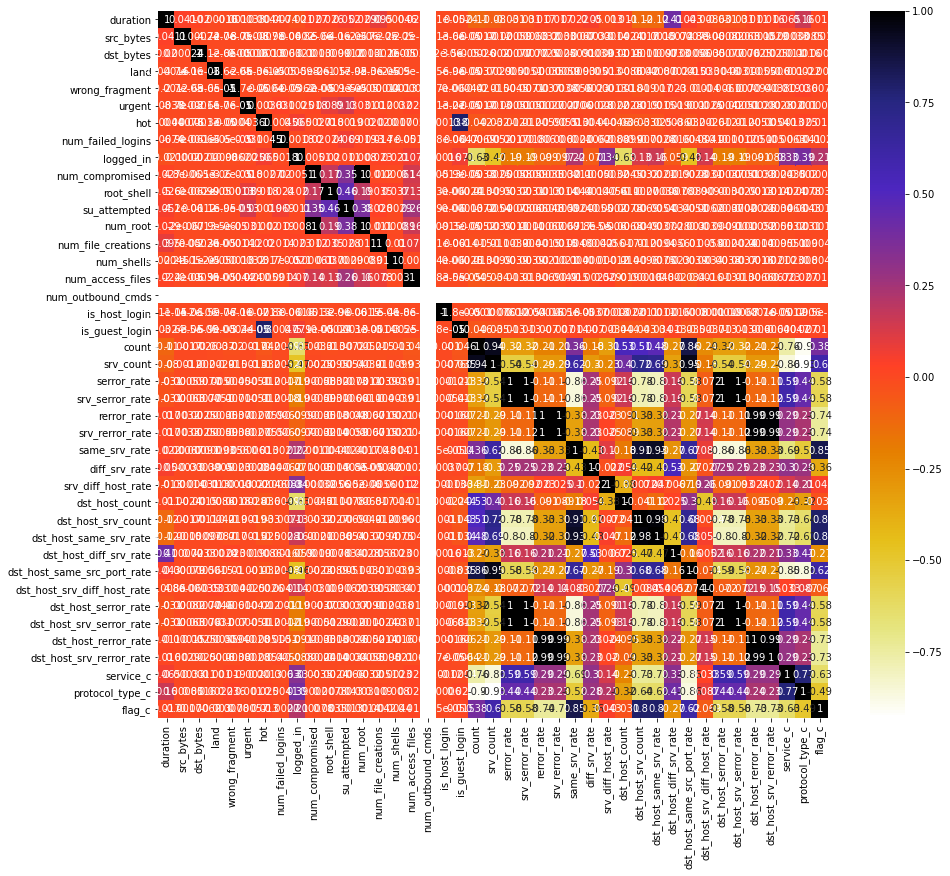

In [14]:
plt.figure(figsize=(15,13))
cor=d_rel.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [15]:
cor_col=set()
for i in range(len(cor.columns)):
    for j in range(i):
        if (cor.iloc[i,j])>0.8:
            temp=cor.columns[i]
            cor_col.add(temp)

In [16]:
print(cor_col)
print(len(cor_col))

{'flag_c', 'is_guest_login', 'srv_rerror_rate', 'dst_host_srv_rerror_rate', 'num_root', 'dst_host_same_srv_rate', 'srv_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate', 'dst_host_rerror_rate', 'srv_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_serror_rate'}
13
